# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [2]:
# Preview the dataset
data

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6
1924-01-01,47.6
1928-01-01,47.8
1932-01-01,46.2
1936-01-01,46.5


Plot this time series data. 

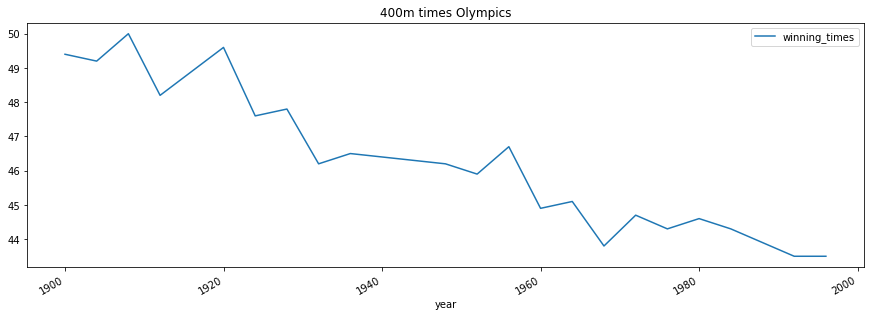

In [7]:
# Plot the time series
data.plot(figsize=(15,5))
plt.title('400m times Olympics')
plt.show()

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [9]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

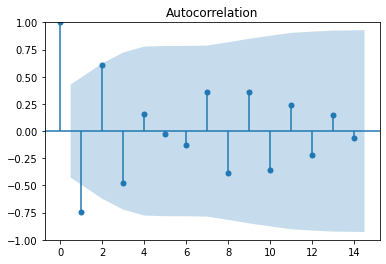

In [12]:
# Plot the ACF
plot_acf(data_diff);

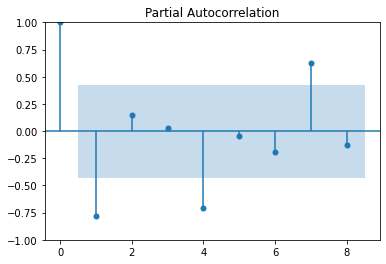

In [14]:
# Plot the PACF
plot_pacf(data_diff, lags =8);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
arma1 = ARIMA(data_diff, order=(1,0,1)).fit()
arma1_summary = arma1.summary()
arma1_summary

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Fri, 29 Apr 2022   AIC                             47.916
Time:                        09:29:00   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.349      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.680      -0.441       0.675
sigma2         0.3784      0.181      2.094      0.036       0.024       0.733
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.90   Prob(JB):                         0.54
Heteroskedasticity (H):               0.31   Skew:                             0.23
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
arma2 = ARIMA(data_diff, order=(2,0,1)).fit()
arma2_summary = arma2.summary()
arma2_summary

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -19.931
Date:                Fri, 29 Apr 2022   AIC                             49.862
Time:                        09:29:23   BIC                             55.084
Sample:                             0   HQIC                            50.995
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2834      0.092     -3.079      0.002      -0.464      -0.103
ar.L1         -0.6102      2.583     -0.236      0.813      -5.673       4.453
ar.L2          0.1280      1.848      0.069      0.945      -3.493       3.749
ma.L1         -0.0208      2.564     -0.008      0.994      -5.046       5.004
sigma2         0.3774      0.181      2.088      0.037       0.023       0.732
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.83   Prob(JB):                         0.55
Heteroskedasticity (H):               0.31   Skew:                             0.22
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
arma3 = ARIMA(data_diff, order=(1,0,0)).fit()
arma3_summary = arma3.summary()
arma3_summary

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Fri, 29 Apr 2022   AIC                             46.107
Time:                        09:29:27   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.034       0.029       0.735
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.84   Prob(JB):                         0.55
Heteroskedasticity (H):               0.33   Skew:                             0.20
Prob(H) (two-sided):                  0.16   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
arma4 = ARIMA(data_diff, order=(0,0,1)).fit()
arma4_summary = arma4.summary()
arma4_summary

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -22.443
Date:                Fri, 29 Apr 2022   AIC                             50.885
Time:                        09:29:32   BIC                             54.019
Sample:                             0   HQIC                            51.565
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3053      0.059     -5.201      0.000      -0.420      -0.190
ma.L1         -0.7390      0.282     -2.620      0.009      -1.292      -0.186
sigma2         0.4780      0.214      2.232      0.026       0.058       0.898
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.38   Prob(JB):                         0.70
Heteroskedasticity (H):               0.26   Skew:                            -0.18
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
arma5 = ARIMA(data_diff, order=(2,0,2)).fit()
arma5_summary = arma5.summary()
arma5_summary

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -16.472
Date:                Fri, 29 Apr 2022   AIC                             44.943
Time:                        09:32:59   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2717      0.103     -2.630      0.009      -0.474      -0.069
ar.L1         -1.7573      0.117    -14.996      0.000      -1.987      -1.528
ar.L2         -0.9180      0.120     -7.667      0.000      -1.153      -0.683
ma.L1          1.5669     47.536      0.033      0.974     -91.602      94.736
ma.L2          0.9985     60.569      0.016      0.987    -117.714     119.711
sigma2         0.2126     12.834      0.017      0.987     -24.942      25.367
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.86   Prob(JB):                         0.65
Heteroskedasticity (H):               0.41   Skew:                            -0.30
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
print(arma1_summary)
print(arma2_summary)
print(arma3_summary)
print(arma4_summary)
print(arma5_summary)

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Fri, 29 Apr 2022   AIC                             47.916
Time:                        09:29:00   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.349      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.6

In [42]:
print(arma3_summary)
print(arma5_summary)

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Fri, 29 Apr 2022   AIC                             46.107
Time:                        09:29:27   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.0

## What is your final model? Why did you pick this model?

arma_3 performs better on BIC and arma_5 is better on AIC. But both are fairly similar.

Resources being no object you'd take arma_5

But, looking at covariance parameters, arma_5 is way more complex. Choose arma_5

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 